In [1]:
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
%matplotlib inline
from FITCvsVFE import *

In [2]:
#setup stuff including getting the training data.
tol=1e-11
nRepeats = 50

predict_limits = [-4.,4.]
inducing_points_limits = [-1.,9]
hold_out_limits = [0.20, 0.60]
optimization_limits = [18.,25.]

xtrain,ytrain,xtest,ytest = getTrainingTestData()


In [3]:
#run exact inference on training data.
exact_model = getRegressionModel(xtrain,ytrain)
exact_model.optimize(max_iters = 2000000, tol=tol )

print("Exact model parameters \n")
printModelParameters( exact_model )

compiling tensorflow function...
done
optimization terminated, setting model state
Exact model parameters 

Likelihood variance  variance transform:+ve prior:None
[ 0.07428547] 

Kernel variance  variance transform:+ve prior:None
[ 0.9004857] 

Kernel lengthscale  lengthscales transform:+ve prior:None
[ 0.58249971] 



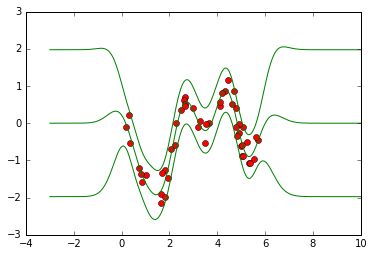

In [4]:
#plot the exact solution and the training data.
figA, axes = plt.subplots(1,1)
axes.plot( xtrain, ytrain, 'ro' )
plotPredictions( axes, exact_model, 'g', None )

In [5]:
#Train VFE model initialized from the perfect solution
VFEmodel, VFEcb = trainSparseModel(xtrain,ytrain,exact_model,False,xtest,ytest)
print("Sparse model parameters for VFE optimization \n")
printModelParameters( VFEmodel )

('repeatIndex ', 0)
compiling tensorflow function...
done
optimization terminated, setting model state
('repeatIndex ', 1)
optimization terminated, setting model state
('repeatIndex ', 2)
optimization terminated, setting model state
('repeatIndex ', 3)
optimization terminated, setting model state
('repeatIndex ', 4)
optimization terminated, setting model state
('repeatIndex ', 5)
optimization terminated, setting model state
('repeatIndex ', 6)
optimization terminated, setting model state
('repeatIndex ', 7)
optimization terminated, setting model state
('repeatIndex ', 8)
optimization terminated, setting model state
('repeatIndex ', 9)
optimization terminated, setting model state
('repeatIndex ', 10)
optimization terminated, setting model state
('repeatIndex ', 11)
optimization terminated, setting model state
('repeatIndex ', 12)
optimization terminated, setting model state
('repeatIndex ', 13)
optimization terminated, setting model state
('repeatIndex ', 14)
optimization terminated, se

In [6]:
#Train FITC model initialized from the perfect solution.
FITCmodel, FITCcb = trainSparseModel(xtrain,ytrain,exact_model,True,xtest,ytest)
print("Sparse model parameters for FITC optimization \n")
printModelParameters( FITCmodel )


('repeatIndex ', 0)
compiling tensorflow function...
done
optimization terminated, setting model state
('repeatIndex ', 1)
optimization terminated, setting model state
('repeatIndex ', 2)
optimization terminated, setting model state
('repeatIndex ', 3)
optimization terminated, setting model state
('repeatIndex ', 4)
optimization terminated, setting model state
('repeatIndex ', 5)
optimization terminated, setting model state
('repeatIndex ', 6)
optimization terminated, setting model state
('repeatIndex ', 7)
optimization terminated, setting model state
('repeatIndex ', 8)
optimization terminated, setting model state
('repeatIndex ', 9)
optimization terminated, setting model state
('repeatIndex ', 10)
optimization terminated, setting model state
('repeatIndex ', 11)
optimization terminated, setting model state
('repeatIndex ', 12)
optimization terminated, setting model state
('repeatIndex ', 13)
optimization terminated, setting model state
('repeatIndex ', 14)
optimization terminated, se

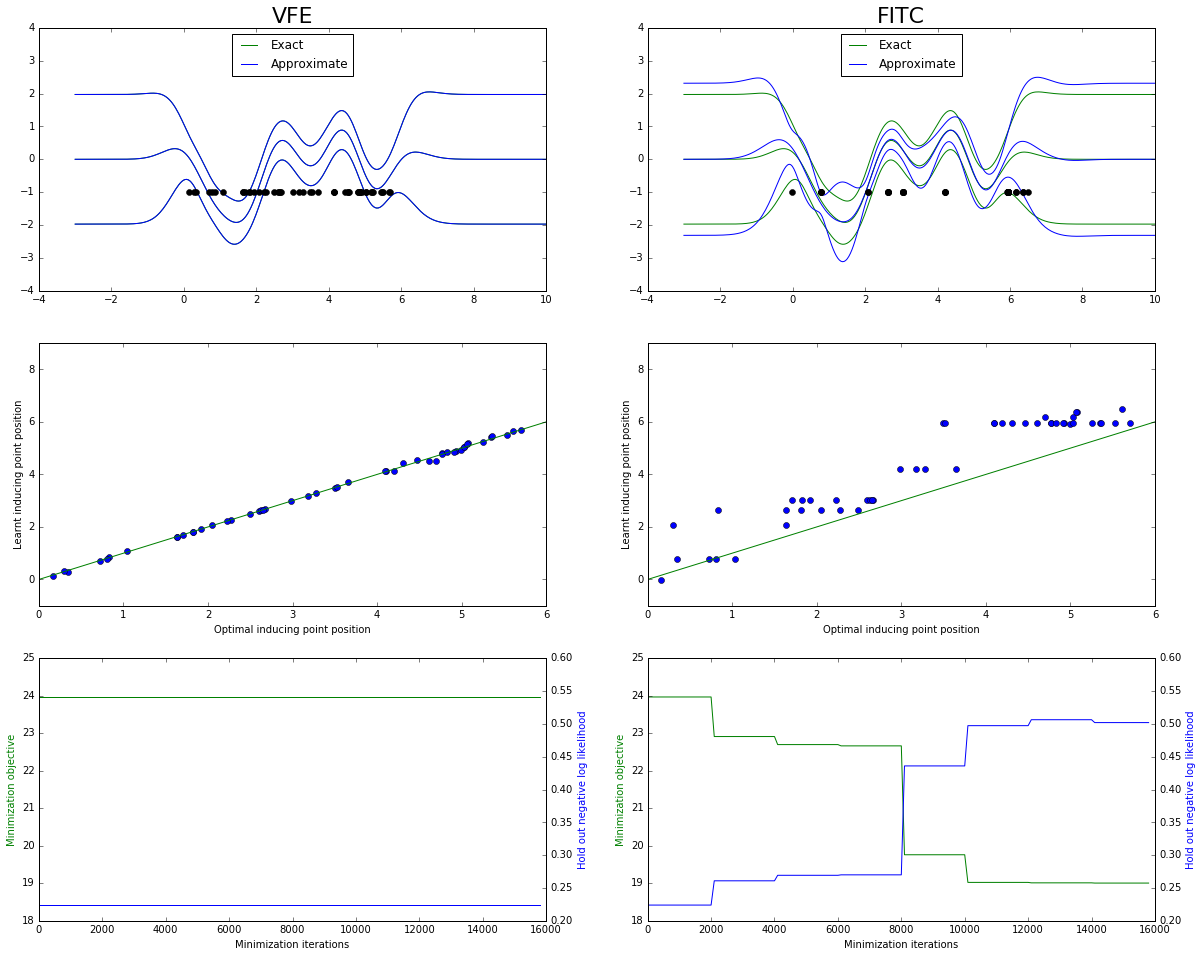

In [7]:
#Plot a comparison of the two algorithms. 
figB, axes = plt.subplots(3,2,figsize=(20, 16))
   
VFEiters = FITCcb.n_iters
VFElog_likelihoods = stretch( len(VFEiters), VFEcb.log_likelihoods )
VFEhold_out_likelihood = stretch(  len(VFEiters), VFEcb.hold_out_likelihood )

plotComparisonFigure( xtrain, VFEmodel, exact_model, axes[0,0], axes[1,0], axes[2,0], VFEiters, VFElog_likelihoods.tolist(), VFEhold_out_likelihood.tolist(), "VFE" )
plotComparisonFigure( xtrain, FITCmodel, exact_model, axes[0,1], axes[1,1], axes[2,1],FITCcb.n_iters, FITCcb.log_likelihoods, FITCcb.hold_out_likelihood , "FITC" )

axes[0,0].set_title('VFE', loc='center', fontdict = {'fontsize': 22} )
axes[0,1].set_title('FITC', loc='center', fontdict = {'fontsize': 22} )  